In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(style="darkgrid")
sns.set(style="ticks")

In [3]:
data = pd.read_csv("results.csv")
data.head()

,Name,High,Hour,Timestamp,Recurrence
0,BYND,137.97,9,05/14/2020 09:39:00,1
1,BYND,139.56,10,05/14/2020 10:31:00,1
2,BYND,141.00,11,05/14/2020 11:15:00,1
3,BYND,138.24,12,05/14/2020 12:57:00,1
4,BYND,137.79,13,05/14/2020 13:00:00,1


In [4]:
corr_mat = data.corr()
corr_mat


,High,Hour,Recurrence
High,1.000000,-0.043046,0.0
Hour,-0.043046,1.000000,0.0
Recurrence,0.000000,0.000000,1.0


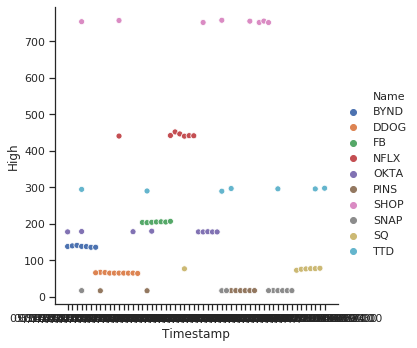

In [6]:
sns.relplot(x="Timestamp", y="High", hue="Name", data=data);

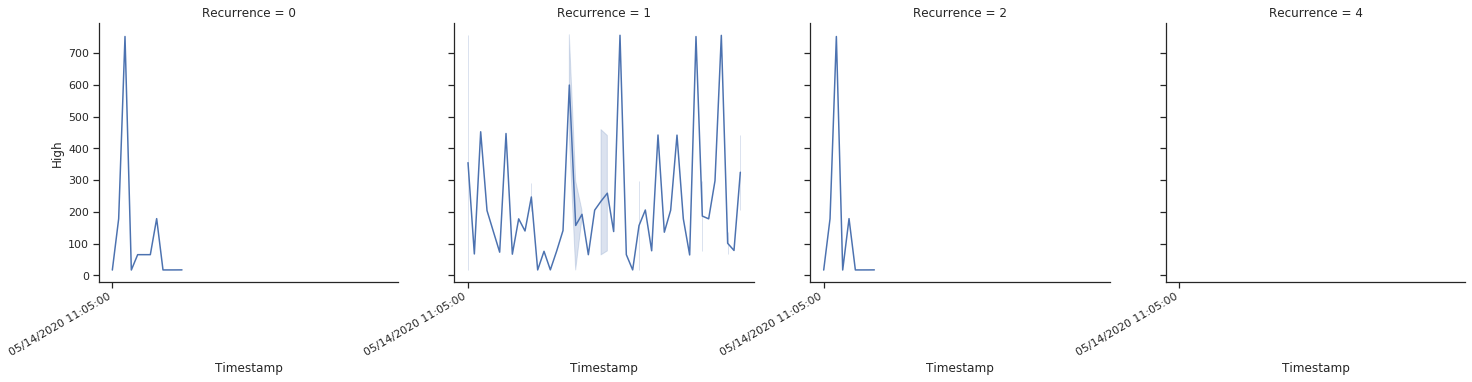

In [7]:
g = sns.relplot(x="Timestamp", y="High", kind="line", col="Recurrence", data=data)
g.fig.autofmt_xdate()

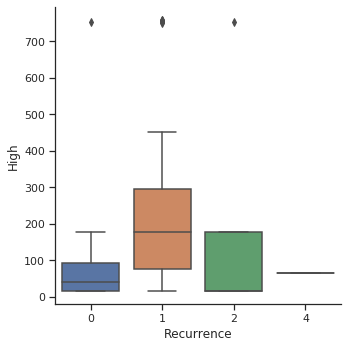

In [8]:
sns.catplot(x="Recurrence", y="High", kind="box",data=data);

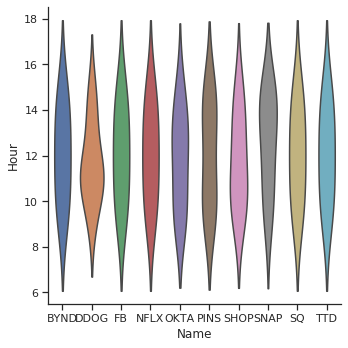

In [9]:
g = sns.catplot(x="Name", y="Hour", kind="violin", inner=None, data=data)


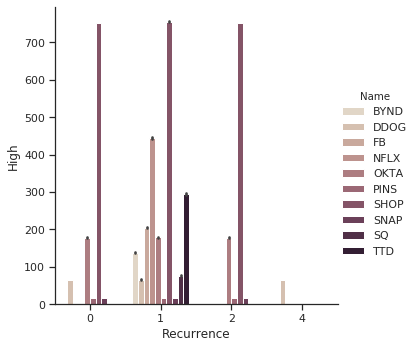

In [10]:
sns.catplot(x="Recurrence", y="High", hue="Name", kind="bar", palette="ch:.25", data=data);

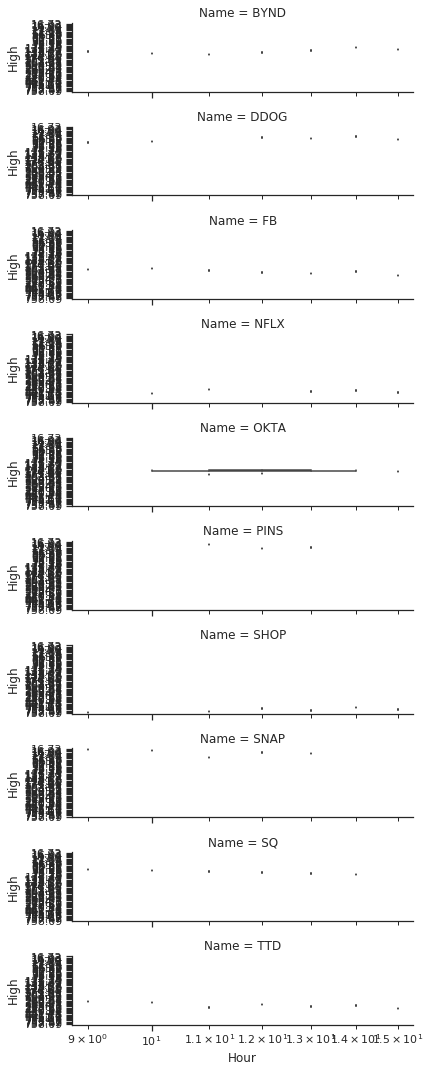

In [12]:
g = sns.catplot(x="Hour", y="High", row="Name",
                kind="box", orient="h", height=1.5, aspect=4,
                data=data.query("Recurrence ==1"))

g.set(xscale="log");

Text(0.5, 1, 'Highest Value Per Time Period')

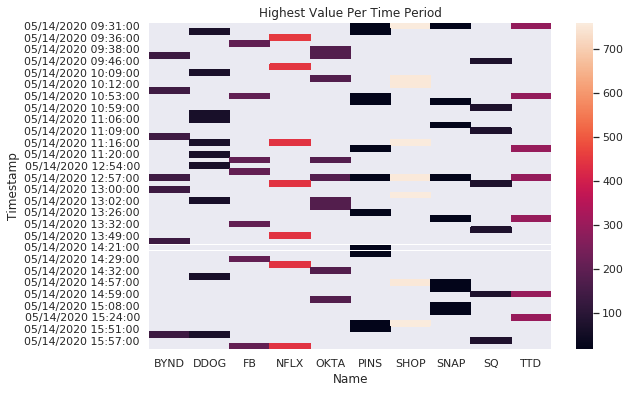

In [13]:
sns.set()
df = data.pivot("Timestamp", "Name", "High",)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, annot=False, linewidths=.00009)
plt.title('Highest Value Per Time Period')

In [14]:
df=df.fillna(0)
df.head()

Name,BYND,DDOG,FB,NFLX,OKTA,PINS,SHOP,SNAP,SQ,TTD
Timestamp,,,,,,,,,,
05/14/2020 09:31:00,0.0,0.00,0.00,0.0,0.0,16.54,758.09,16.73,0.0,289.45
05/14/2020 09:32:00,0.0,67.25,0.00,0.0,0.0,16.54,0.00,0.00,0.0,0.00
05/14/2020 09:36:00,0.0,0.00,0.00,452.0,0.0,0.00,0.00,0.00,0.0,0.00
05/14/2020 09:37:00,0.0,0.00,203.87,0.0,0.0,0.00,0.00,0.00,0.0,0.00
05/14/2020 09:38:00,0.0,0.00,0.00,0.0,178.0,0.00,0.00,0.00,0.0,0.00


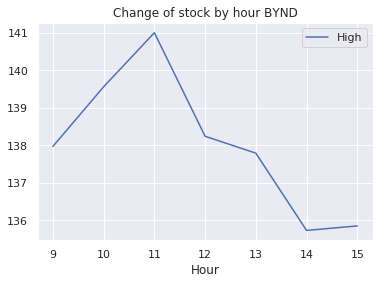

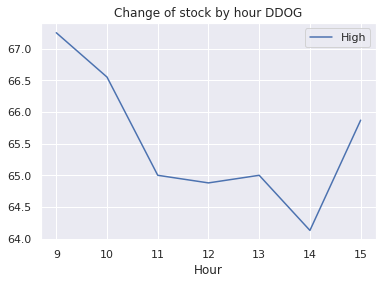

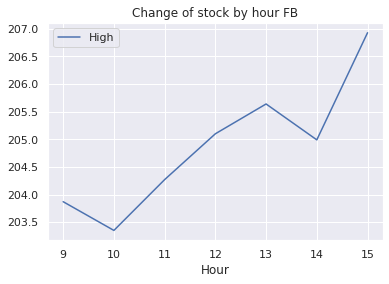

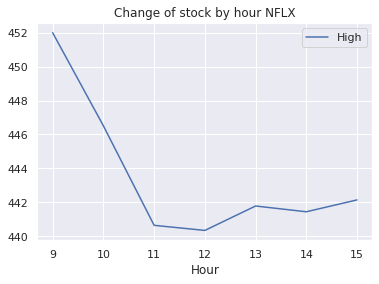

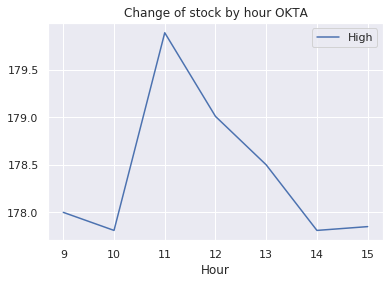

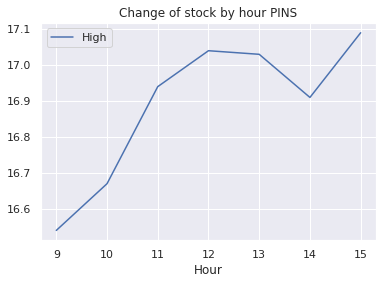

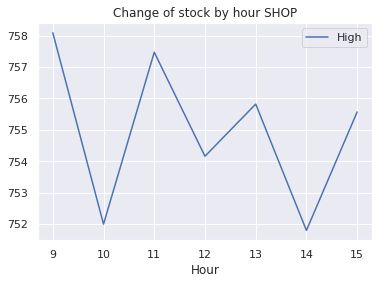

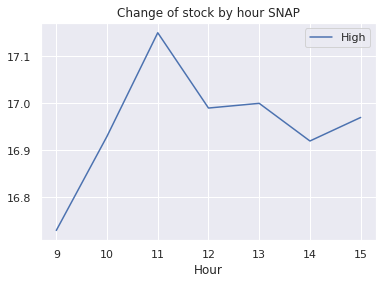

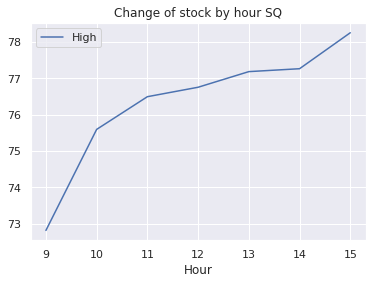

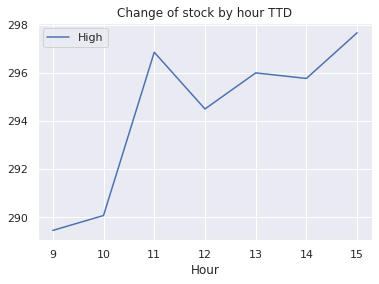

In [15]:
df = data[['Name','High','Hour']]

for i in df['Name'].unique():
    plot = df[df['Name'] == i]
    plot.set_index('Hour').plot(kind='line')
    plt.title(f'Change of stock by hour {i}')
    plt.show()